## Analyzing Dog Adoption Rates in Sonoma County






11/04/2022

"Authors:
Dominic Sagen, Zaichic Turner, and Priyadrshini Sawant"

## Introduction

In this notebook we use data about the dogs in the animal shelter of Sonoma County to see how well we can predict dogs being adpoted given variables like
`breed`, `Days in Shelter`, `Outcome Condition`,`Intake type`,`Outcome Type` and `Size`.  

We will be answering these questions to help us in visualize the data:-

*   What breeds are most commonly adopted?
*   How does the length of stay in the shelter affect the outcome?
*   Does size affect the outcome of the dog?

The dataset was taken from Sonoma animal shelter site.

https://data.sonomacounty.ca.gov/Government/Animal-Shelter-Intake-and-Outcome/924a-vesw/data 





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [ ]:
sns.set()
rcParams['figure.figsize'] = 8,6
sns.set_context('talk')  
sns.set_style('whitegrid')

## Initial Data Exploration

The first step is to read in the data from the CSV file provided.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/grbruns/cst383/master/sonoma-shelter-12-2022.csv')

We will now take a moment to examine the data.

In [ ]:
df.shape

(22108, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22108 entries, 0 to 22107
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  16406 non-null  object 
 1   Type                  22108 non-null  object 
 2   Breed                 22108 non-null  object 
 3   Color                 22108 non-null  object 
 4   Sex                   22108 non-null  object 
 5   Size                  22075 non-null  object 
 6   Date Of Birth         16709 non-null  object 
 7   Impound Number        22108 non-null  object 
 8   Kennel Number         22099 non-null  object 
 9   Animal ID             22108 non-null  object 
 10  Intake Date           22108 non-null  object 
 11  Outcome Date          21972 non-null  object 
 12  Days in Shelter       22108 non-null  int64  
 13  Intake Type           22108 non-null  object 
 14  Intake Subtype        22108 non-null  object 
 15  Outcome Type       

There appears to be a fairly large number of variables that will simply be irrelevant for our purposes (`Name`, `Type`, `Kennel Number`, `Count`, etc.). These variables will be removed in the Data Preprocessing step.

The next question would be whether or not there are variables with a large proportion of NA values.

In [ ]:
df.isna().mean()[df.isna().mean() >= 0.01].sort_values(ascending=False).round(2)

Name                    0.26
Date Of Birth           0.24
Outcome Zip Code        0.14
Location                0.14
Outcome Jurisdiction    0.14
Outcome Condition       0.02
Outcome Subtype         0.02
dtype: float64

Above we see that there are some columns that are as much as 25% NA values (`Name`, `Date Of Birth`, etc.). We will likely need to remove these columns in their entirety. In the case of those with a relatively low proportion of NA values, we could attempt to impute the missing values by inserting the median values in the case of quantitative variables or mode for categorical variables. These operations will again be performed in the Data Preprocessing section.

In [ ]:
df.nunique().sort_values(ascending=False)

Impound Number          22108
Animal ID               19994
Name                     6080
Date Of Birth            5223
Intake Date              2771
Outcome Date             2449
Breed                     977
Location                  635
Outcome Zip Code          635
Color                     327
Days in Shelter           262
Outcome Subtype           227
Kennel Number             162
Intake Subtype             29
Intake Jurisdiction        13
Outcome Jurisdiction       12
Outcome Type                9
Intake Type                 7
Size                        7
Outcome Condition           6
Intake Condition            5
Sex                         5
Type                        3
Count                       2
dtype: int64

Above you can see the unique values in the dataframe.

Here we are show basic understanding for the outcome type for all the animals

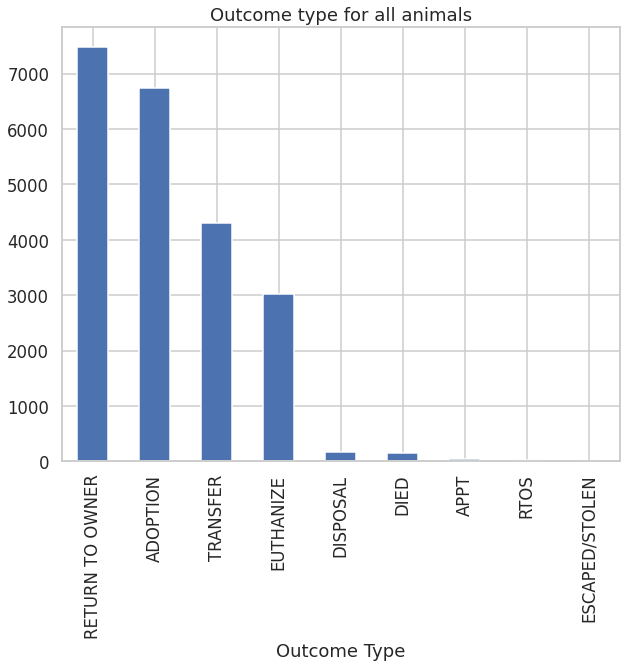

In [ ]:
plt.subplots(figsize=(10,8))
df['Outcome Type'].value_counts().plot(kind='bar' )
plt.title('Outcome type for all animals')
plt.xlabel('Outcome Type');

## Data cleaning and preprocessing

We are going to begin the data preprocessing phase by removing any rows in which the animal type is not 'DOG' seeing as this is the focus for our investigation.

In [ ]:
df = df[df['Type'] == 'DOG']

We now need to remove any variables that are not strictly relevant to our investigation. The columns we are going to focus on are:
*   `Breed`
*   `Days in Shelter`
*   `Outcome Type`
*   `Outcome Condition`
*   `Size`
*   `Intake Type`




In [ ]:
vars = ['Breed', 'Days in Shelter', 'Outcome Type', 'Outcome Condition', 'Size','Intake Type']

df = df[df.columns[df.columns.isin(vars)]]

The next step is to sort out the NA values.

In [ ]:
df.isna().sum()

Breed                  0
Size                  31
Days in Shelter        0
Intake Type            0
Outcome Type          75
Outcome Condition    176
dtype: int64

There appears to be a large number of rows where `Outcome Condition` is missing data wehereas `Outcome Type` has a value. For these, we will impute the missing `Outcome Condition` values with the most common `Outcome Condition` for the respective `Outcome Type`.

In [ ]:
modes = df.groupby('Outcome Type')['Outcome Condition'].agg(pd.Series.mode)
for t in modes.index:
  df.loc[(df['Outcome Type'] == t), ['Outcome Condition']] = modes[t]

In [ ]:
df.isna().sum()

Breed                 0
Size                 31
Days in Shelter       0
Intake Type           0
Outcome Type         75
Outcome Condition    75
dtype: int64

We can now simply remove the other rows.

In [ ]:
df.dropna(inplace=True)

## Data exploration and visualization

### Does Breed play a role? - Priyadarshini Sawant

In this section we would see which are most common breeds which get adopted or returned to their owner. We would be using `Breed` variable , `Outcome Type` variable and `Intake Type` to explore the data.



Here we are checking the top 10 breeds in the animal shelter.

In [ ]:
x=df['Breed'].value_counts(ascending =False).index
df[df['Breed'].isin(x)][:10]

,Breed,Size,Days in Shelter,Intake Type,Outcome Type,Outcome Condition
0,BEAGLE,MED,3,STRAY,RETURN TO OWNER,HEALTHY
1,CHIHUAHUA SH,SMALL,49,STRAY,ADOPTION,HEALTHY
7,LABRADOR RETR/MIX,MED,1,CONFISCATE,RETURN TO OWNER,HEALTHY
8,LABRADOR RETR,MED,0,STRAY,RETURN TO OWNER,HEALTHY
9,GERM SHEPHERD/MIX,LARGE,0,STRAY,RETURN TO OWNER,HEALTHY
13,SHIBA INU,MED,1,STRAY,RETURN TO OWNER,HEALTHY
14,PIT BULL,MED,1,STRAY,RETURN TO OWNER,HEALTHY
17,BOXER/PIT BULL,LARGE,100,OWNER SURRENDER,ADOPTION,HEALTHY
18,PIT BULL,MED,0,CONFISCATE,RETURN TO OWNER,HEALTHY
20,CHIHUAHUA SH/MIX,TOY,1,STRAY,RETURN TO OWNER,HEALTHY


We used the above data to plot a horizontal  bar graph for top 10 breeds in the animal shelter.

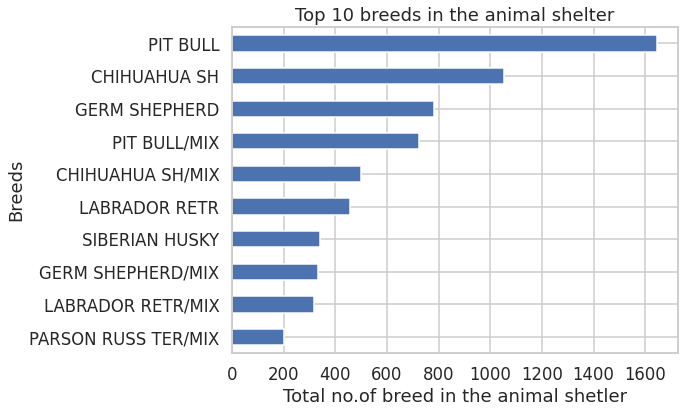

In [ ]:
df['breed_top']=df['Breed']
df['breed_top'].value_counts().head(10).sort_values(ascending=True).plot.barh()
plt.title("Top 10 breeds in the animal shelter")
plt.xlabel('Total no.of breed in the animal shetler')
plt.ylabel('Breeds');

Here we are checking the 'intake type' of dogs. As you can see there are more number of 'Stray' which are in the animal shelter.Lets focuse on Stray and see their breed.

In [ ]:
df['Intake Type'].value_counts()

STRAY              8968
OWNER SURRENDER    1267
CONFISCATE         1237
QUARANTINE          337
TRANSFER            258
ADOPTION RETURN     253
OS APPT              28
Name: Intake Type, dtype: int64

Lets take a closer look to 'Stray' variable and see which breeds it compares to

In [ ]:
stray_dog=df[df['Intake Type']=='STRAY']
#top 10 stray dogs
stray_dog['Breed'].value_counts().head(10)

PIT BULL               1077
CHIHUAHUA SH            772
GERM SHEPHERD           601
PIT BULL/MIX            488
LABRADOR RETR           401
CHIHUAHUA SH/MIX        365
SIBERIAN HUSKY          284
GERM SHEPHERD/MIX       254
LABRADOR RETR/MIX       234
PARSON RUSS TER/MIX     145
Name: Breed, dtype: int64

Here we see Pitbull breed  are mostly abandonded by their pervious owners.Let plot a graph to visualize the data better

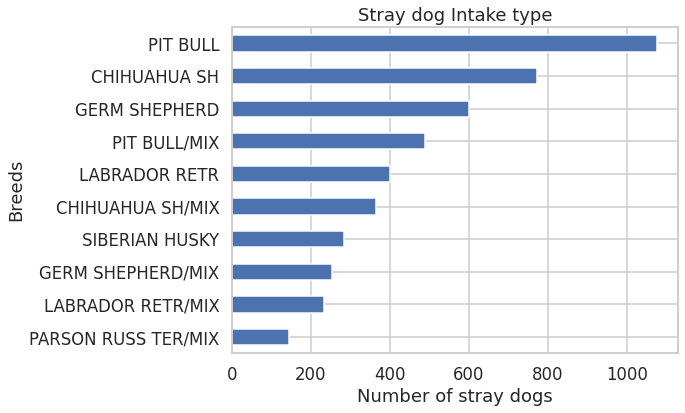

In [ ]:
stray_dog['Breed'].value_counts().head(10).sort_values(ascending=True).plot.barh()
plt.title("Stray dog Intake type")
plt.xlabel('Number of stray dogs')
plt.ylabel('Breeds');

As you can see Pitbull ,Chihuahua and followed by German shepheard have been most abandoned by their pervious owners.
Now look at the outcome type 

Here we took the top 5 most common breeds and compared with the `outcome type`. You can see pit bull being the higest breed to return to their owner.

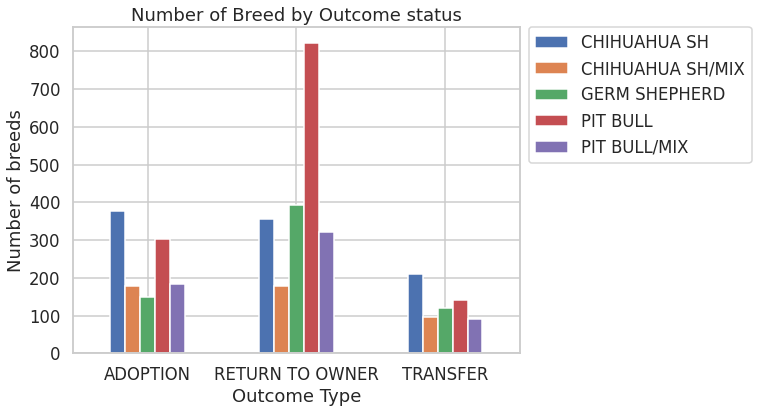

In [ ]:
x=df['Breed'].value_counts().index[:5]
y=df[df['Breed'].isin(x)]
z=y[y['Outcome Type'].isin( ['RETURN TO OWNER', 'ADOPTION', 'TRANSFER','EUTHANIZED'])]
pd.crosstab(z['Outcome Type'], z['Breed']).plot.bar(rot=0)
plt.title('Number of Breed by Outcome status')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("Outcome Type")
plt.ylabel('Number of breeds');

From the graphs of outcome type and intake type , we see'Pit Bull' came in first as 'abandoned' or 'stray' pets but fall short to 'Chihuahua Sh' as per number of adoption.



This section has led us to the conclusion that Pit Bull has the best owner return to abandon ratio. The majority of Pit Bulls were taken in              (as strays), and fewer people adopted Pit Bulls. Pit bulls are the breed most likely to be given back to its owner.

### Dog Size vs Outcome Types - Dominic Sagen

In this section, I decided to look into whether the size of the dog affected the outcome of the dog. I had a feeling that smaller dogs would be more appealing as pets, and so I decided to first investigate the data from the Sonoma shelter regarding adoptions. The variables will be `Outcome Type` and `Size`.

I figured the data would be more concise if I combined some sizes of similar nature, so I renamed `PUPPY` and `TOY` to `SMALL`, and `X-LRG` to `LARGE`. 

In [ ]:
size_cmp = {'PUPPY' : 'SMALL', 'TOY' : 'SMALL', 'X-LRG' : 'LARGE'}
df_adopt = df.copy()
df_adopt['Size'] = df_adopt['Size'].replace(size_cmp)
df_adopt['Size'].value_counts()

SMALL    4844
LARGE    3825
MED      3679
Name: Size, dtype: int64

Then I needed to group by `Outcome Type` in order to find the rate at which dogs were being adopted for each size.

In [ ]:
adopt = df_adopt.groupby('Outcome Type')['Size']
sizeGroup = df_adopt.groupby('Size')['Outcome Type']
values_adopt = adopt.value_counts() / sizeGroup.size()
values_adopt['ADOPTION']

Size
SMALL    0.352188
MED      0.201957
LARGE    0.150588
dtype: float64

After plotting the data, I realized that `SMALL` was adopted at the highest rate by a significant margin when I included puppies and toys in the mix. I felt that this data may have been misleading, as there are many dogs that are just natrually small rather than being young.

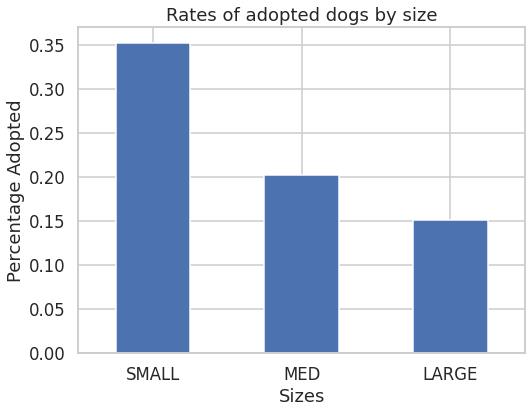

In [ ]:
values_adopt['ADOPTION'].plot.bar(rot=0)
plt.title('Rates of adopted dogs by size')
plt.xlabel('Sizes')
plt.ylabel('Percentage Adopted');

To find out whether the other variables were messing with the data, I made a new copy for only grown dogs, and removed the data for `PUPPY` and `TOY`. I still replaced any dogs that were `X-LRG` with `LARGE`. I think found the rate at which dogs were adopted vs other factors based on size.

In [ ]:
df_adopt_grown = df.copy()
df_adopt_grown = df_adopt_grown[(df_adopt_grown['Size'] != 'PUPPY') & (df_adopt_grown['Size'] != 'TOY')]
df_adopt_grown['Size'] = df_adopt_grown['Size'].replace({'X-LRG' : 'LARGE'})
adopt = df_adopt_grown.groupby('Outcome Type')['Size']
sizeGroup = df_adopt_grown.groupby('Size')['Outcome Type']
values_adopt2 = adopt.value_counts() / sizeGroup.size()

Upon plotting this version of the graph, I believe that size does in fact play a role in the rate of adoption, as there was a near 50% increase in smaller dogs adopted compared to medium sized dogs, and nearly double large dogs.. Now I think I'll further my investigations by seeing whether size has an impact on the other major outcome type: `RETURNED TO OWNER`.

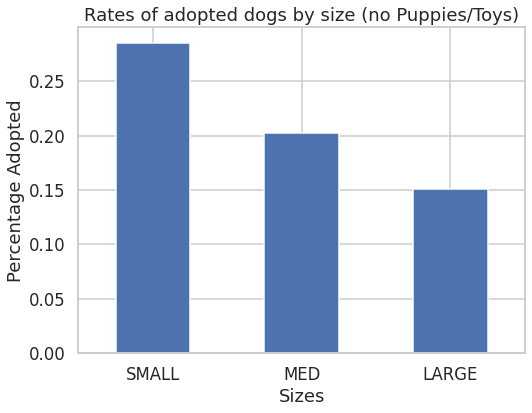

In [ ]:
values_adopt2['ADOPTION'].plot.bar(rot=0)
plt.title('Rates of adopted dogs by size (no Puppies/Toys)')
plt.xlabel('Sizes')
plt.ylabel('Percentage Adopted');

Seeing as a dog being returned to owner is the most common outcome for a dog at the Sonoma shelter, I decided to also plot whether size affected the rate of a dog being returned.

In [ ]:
return_size_cmp = {'TOY' : 'SMALL', 'X-LRG' : 'LARGE'}
df_returned = df[(df['Size'] != 'PUPPY')].copy()
df_returned['Size'] = df_returned['Size'].replace(size_cmp)
returned = df_returned.groupby('Outcome Type')['Size']
size_group = df_returned.groupby('Size')['Outcome Type']
values_returned = adopt.value_counts() / sizeGroup.size()

After plotting this, I noticed that Large and Medium dogs have a rate of over 50% to be returned to their original owner, which I found quite heartwarming. My theory for why small dogs were returned less often has to do with them being less capable of defending themselves before they can be found and sent to an animal shelter such as this one, but it could also be that smaller dogs are less commonly lost in this area.

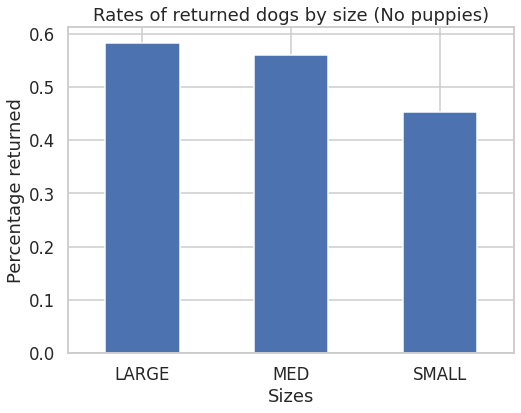

In [ ]:
values_returned['RETURN TO OWNER'].plot.bar(rot=0)
plt.title('Rates of returned dogs by size (No puppies)')
plt.xlabel('Sizes')
plt.ylabel('Percentage returned');

### Days in Shelter vs Outcome - Zaichic Turner



In this section we are going to explore the question as to how the number of days in the shelter affects the outcome. The variables I will be analyzing are `Days in Shelter`, `Outcome Type`, and `Outcome Condition`.

To begin, we will restrict the `Days in Shelter` variable to within 3 standard deviations above the mean.

In [ ]:
df_new = df[df['Days in Shelter'] <= (df['Days in Shelter'].mean() + df['Days in Shelter'].std() * 3)]

We will now plot each variable's distribution utilising a kernel density plot for the numerical variable: `Days in Shelter` and histograms for the categorical variables, namely `Outcome Type` and `Outcome Condition`.

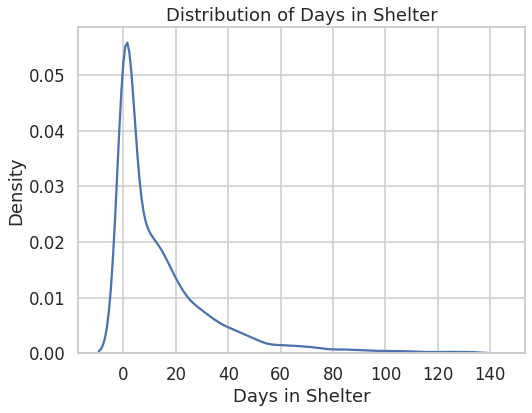

In [ ]:
sns.kdeplot(data=df_new['Days in Shelter'])
plt.title('Distribution of Days in Shelter');

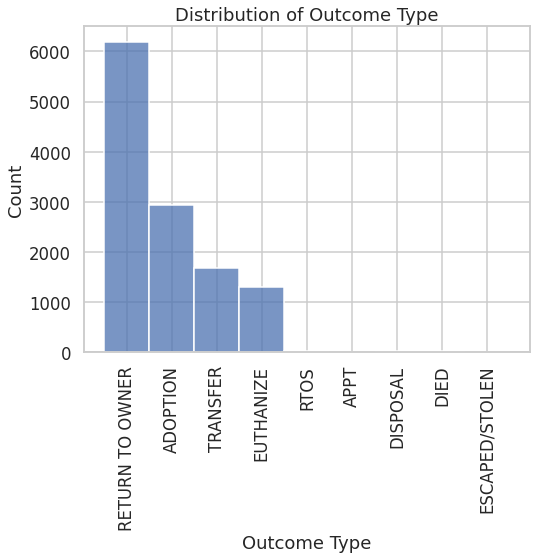

In [ ]:
sns.histplot(data=df_new['Outcome Type'])
plt.xticks(rotation=90)
plt.title('Distribution of Outcome Type');

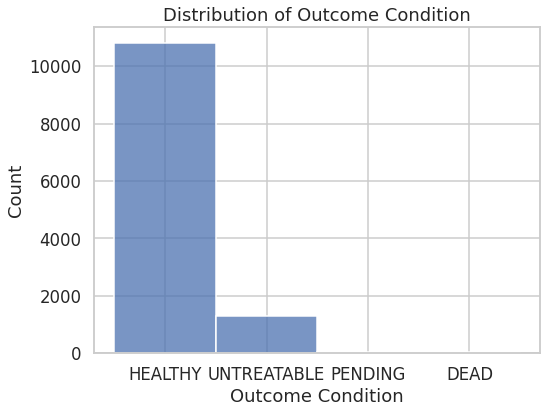

In [ ]:
sns.histplot(data=df_new['Outcome Condition'])
plt.title('Distribution of Outcome Condition');

There appears to be a significant positive skew in the `Days in Shelter` distribution with most dogs tending to stay a lower number of days in the shelter. This would likely affect the other variables. For example, since both 'Retun to Owner' and 'Healthy' have such high counts compared to the others, it's possible to draw a somewhat of a correlation between these values.

To examine this correlation further, we will compare the `Days in Shelter` to the `Outcome Type`.

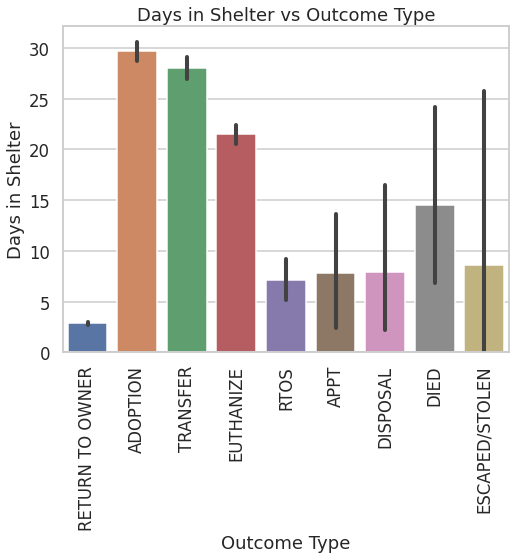

In [ ]:
sns.barplot(data=df_new, x='Outcome Type', y='Days in Shelter')
plt.xticks(rotation=90)
plt.title('Days in Shelter vs Outcome Type');

As predicted, the dogs that were returned to their owners only stayed around 3 days on average. More interestingly, however, those that ended up getting adopted tended to stay for the longest average time (~30 days).

We will now compare the `Days in Shelter` to the `Outcome Condition`.

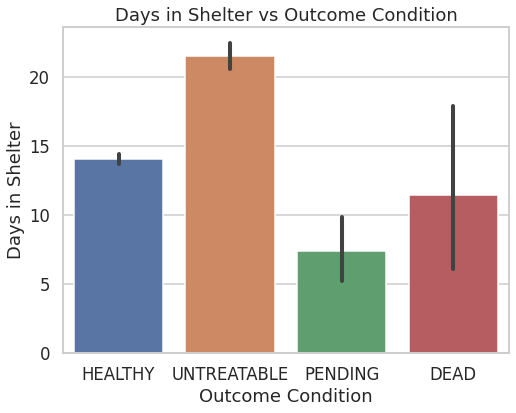

In [ ]:
sns.barplot(data=df_new, x='Outcome Condition', y='Days in Shelter')
plt.title('Days in Shelter vs Outcome Condition');

In the above chart, the correlation identified above appears to be less obvious - with healthy dogs staying on average 14 days. This kind of makes sense as we would expect healthy dogs to either be returned to their owner, adopted, or transferred.

We can confirm this assumption by plotting all three variables in a grouped bar plot.

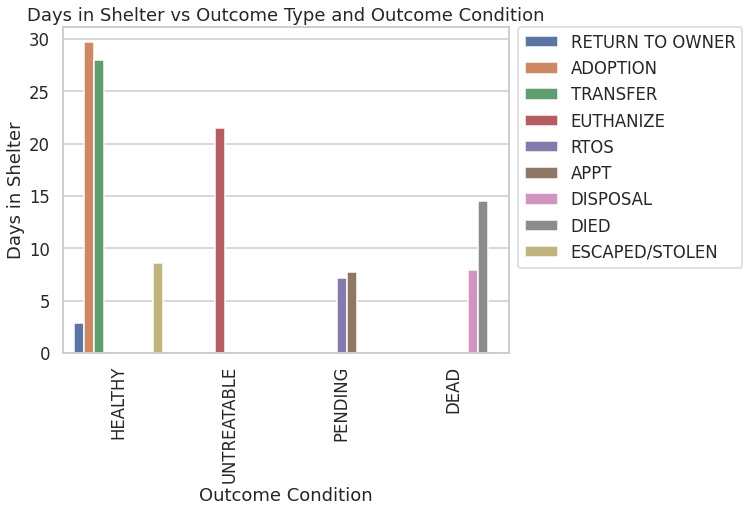

In [ ]:
sns.barplot(data=df_new, x='Outcome Condition', y='Days in Shelter', hue='Outcome Type', ci=None)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Days in Shelter vs Outcome Type and Outcome Condition')
plt.xticks(rotation=90);

## Conclusions

Pit bulls are the breed that is abandoned by their owners but also returned to their owners, and their adoption rate is low, according to the plots in the area where breed matters with the outcome and intake type. I(Priya) found it unique that the owners abandoned the breed and want them back as their return rate is rather high compared to the rest. With this project, I had a problem comparing the outtake with the breed, and then I thought to compare the breed with the outtake and intake to compare the data and come to the conclusion.

I (Dominic) discovered that size did seem to have a noticable correlation between a dog being adopted vs something else happening to them, as a 50-100% increase in adoption rate is pretty substantial between sizes, even with excluding puppies and toys. One thing I struggled with on this project was getting the percentages of dogs adopted over 3 different sizes, but I found a way to get it working in the end.

Through my investigation of the data I have reached a number of conclusions relating to the average number of days spent in the shelter and the outcome. To begin with, dogs were typically returned to there owners healthy in a relatively short timeframe - on average around 3 days. The other healthy dogs typically stayed a much longer timeframe - on average ~28 days - and were either adopted or transferred. In addition, the dogs that were deemed untreatable were regretably but understandably euthanised. Another interesting point was that those few that managed to escape or were stolen typically did so in under 10 days. However, this and the other categories not mentioned so far made up such a small proportion of the population that it's difficult to draw conclusions appropriately.